In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
include("HyperECNNs.jl")
rng = MersenneTwister(0);

In [2]:
MarkerList = ["o","s","v","^",">","<"];
LineStyleList = ["solid","dashed","solid","dashed","solid","dashed"];

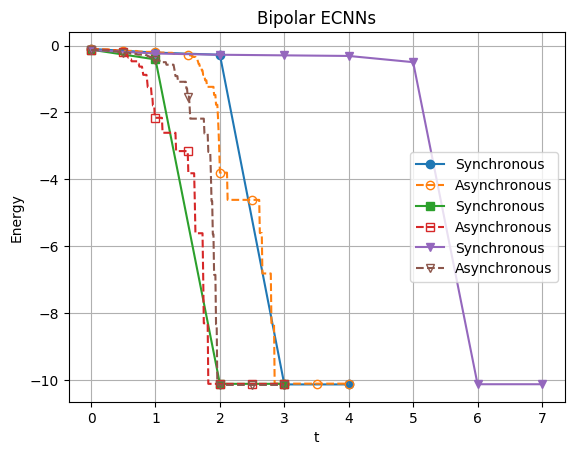

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [3]:
N = 100
P = 160
alpha = 10/N
beta = -10

for i=1:3
    U = 2*rand(rng,Bool,(N,P)).-1
    x = 2*rand(rng,Bool,(N,1)).-1

    y, Energy_Sync = HyperECNNs.UnitQ_Sync(U,x,alpha,beta)
    y, Energy_Seq = HyperECNNs.UnitQ_Seq(U,x,alpha,beta)
    
    plot(collect(0:length(Energy_Sync)-1),Energy_Sync, linestyle = LineStyleList[1], marker = MarkerList[i], label = "Synchronous")
    plot(collect(0:length(Energy_Seq)-1)/N,Energy_Seq, linestyle = LineStyleList[2], marker = MarkerList[i], markevery=50,  mfc="none", label = "Asynchronous")
end
xlabel("t")
ylabel("Energy")
title("Bipolar ECNNs")
legend()
grid()
savefig("Figures/EnergyBipolar.eps")
savefig("Figures/EnergyBipolar.pdf")